## Data Exploration for Better Understanding

# Load All Data 

In [1]:
import os
import pandas as pd

# Set your path
path = "C:\\Users\\raval\\Downloads\\priyank\\priyank\\Data"

# List all files in the directory
all_files = os.listdir(path)

# Filter only CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Initialize an empty dictionary to store DataFrames
dataframes = {}

# Loop through all the CSV files and read them into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(path, csv_file)
    dataframes[csv_file] = pd.read_csv(file_path)

# Now 'dataframes' is a dictionary with filenames as keys and DataFrames as values.


C:\Users\raval\AppData\Local\Temp\ipykernel_1012\2713148945.py:19: DtypeWarning: Columns (0,1,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[csv_file] = pd.read_csv(file_path)
C:\Users\raval\AppData\Local\Temp\ipykernel_1012\2713148945.py:19: DtypeWarning: Columns (0,1,2,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110) have mixed types. Specify dtype op

# Preprocees and Cleaning

In [8]:
import os
import pandas as pd
from tkinter import messagebox

def file_clean(df, filename):
    df = df[df[df[0] == "Row"].index[0]:]
    df = df.reset_index(drop=True)
    df.columns = df.iloc[0].tolist()
    df = df[1:]
    df["SlideEvent"] = df["SlideEvent"].ffill()
    df = df.loc[df.SlideEvent == "StartMedia"]
    # Drop columns if they exist in the DataFrame
    columns_to_drop = ["EventSource"]
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
    df = df.reset_index(drop=True)
    df["Participant"] = filename
    return df

def clean_files(raw_path, output_path):
    columns_to_keep = [
        'Timestamp', 'Row', 'StimType', 'Duration', 'SourceStimuliName', 'CollectionPhase',
        'SlideEvent', 'Participant', 'SampleNumber', 'Anger', 'Contempt', 'Disgust', 'Fear', 
        'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 
        'Neutral', 'ET_GazeLeftx', 'ET_GazeLefty', 'ET_GazeRightx', 'ET_GazeRighty', 'ET_PupilLeft', 
        'ET_PupilRight','GSR RAW',	'GSR Resistance CAL', 'GSR Conductance CAL',	'Heart Rate PPG ALG',
    ]
    
    os.makedirs(output_path, exist_ok=True)
    
    for file in os.listdir(raw_path):
        file_path = os.path.join(raw_path, file)
        try:
            df = pd.read_csv(file_path, header=None, low_memory=False)
        except pd.errors.ParserError as e:
            messagebox.showerror("Error", f"Error reading CSV file: {file_path}\n{e}")
            continue
        
        filename = file.split(".")[0].split("_")[1]
        cleaned_df = file_clean(df, filename)
        
        if cleaned_df is not None:
            # Keep only the columns that exist in the DataFrame
            existing_columns = [col for col in columns_to_keep if col in cleaned_df.columns]
            
            # If any columns are missing, print a message or log it
            missing_columns = [col for col in columns_to_keep if col not in cleaned_df.columns]
            if missing_columns:
                print(f"Warning: Missing columns {missing_columns} in file {file}")
            
            cleaned_df = cleaned_df[existing_columns]
            cleaned_csv_filename = f"{filename}_cleaned.csv"
            cleaned_csv_path = os.path.join(output_path, cleaned_csv_filename)
            cleaned_df.to_csv(cleaned_csv_path, index=False)


# Example usage:
raw_path = "C:\\Users\\raval\\Downloads\\priyank\\priyank\\Data"
output_path = "C:\\Users\\raval\\Downloads\\priyank\\priyank\\Cleaned_Data\\all"
clean_files(raw_path, output_path)


# Load Clean Csv Files

In [21]:
import os
import pandas as pd

# Set your path
path = "C:\\Users\\raval\\Downloads\\priyank\\priyank\\Cleaned_Data\\all"

# List all files in the directory
all_files = os.listdir(path)

# Filter only CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Initialize an empty dictionary to store DataFrames
dataframes = {}

# Loop through all the CSV files and read them into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(path, csv_file)
    dataframes[csv_file] = pd.read_csv(file_path)

# Now 'dataframes' is a dictionary with filenames as keys and DataFrames as values.


In [12]:
# Convert 'Timestamp' to datetime type and set it as index
for filename, df in dataframes.items():
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)


In [13]:
# For example, to get mean 'Anger' level for each 'Participant'
for filename, df in dataframes.items():
    print(df.groupby('Participant')['Anger'].mean())


Participant
R10    3.540259
Name: Anger, dtype: float64
Participant
R11    0.05647
Name: Anger, dtype: float64
Participant
R12    0.055335
Name: Anger, dtype: float64
Participant
R1    5.124017
Name: Anger, dtype: float64
Participant
R2    2.692062
Name: Anger, dtype: float64
Participant
R3    0.534562
Name: Anger, dtype: float64
Participant
R4    1.528224
Name: Anger, dtype: float64
Participant
R5    1.787626
Name: Anger, dtype: float64
Participant
R6    1.605985
Name: Anger, dtype: float64
Participant
R7    0.358541
Name: Anger, dtype: float64
Participant
R8    0.550824
Name: Anger, dtype: float64
Participant
R9    7.622541
Name: Anger, dtype: float64


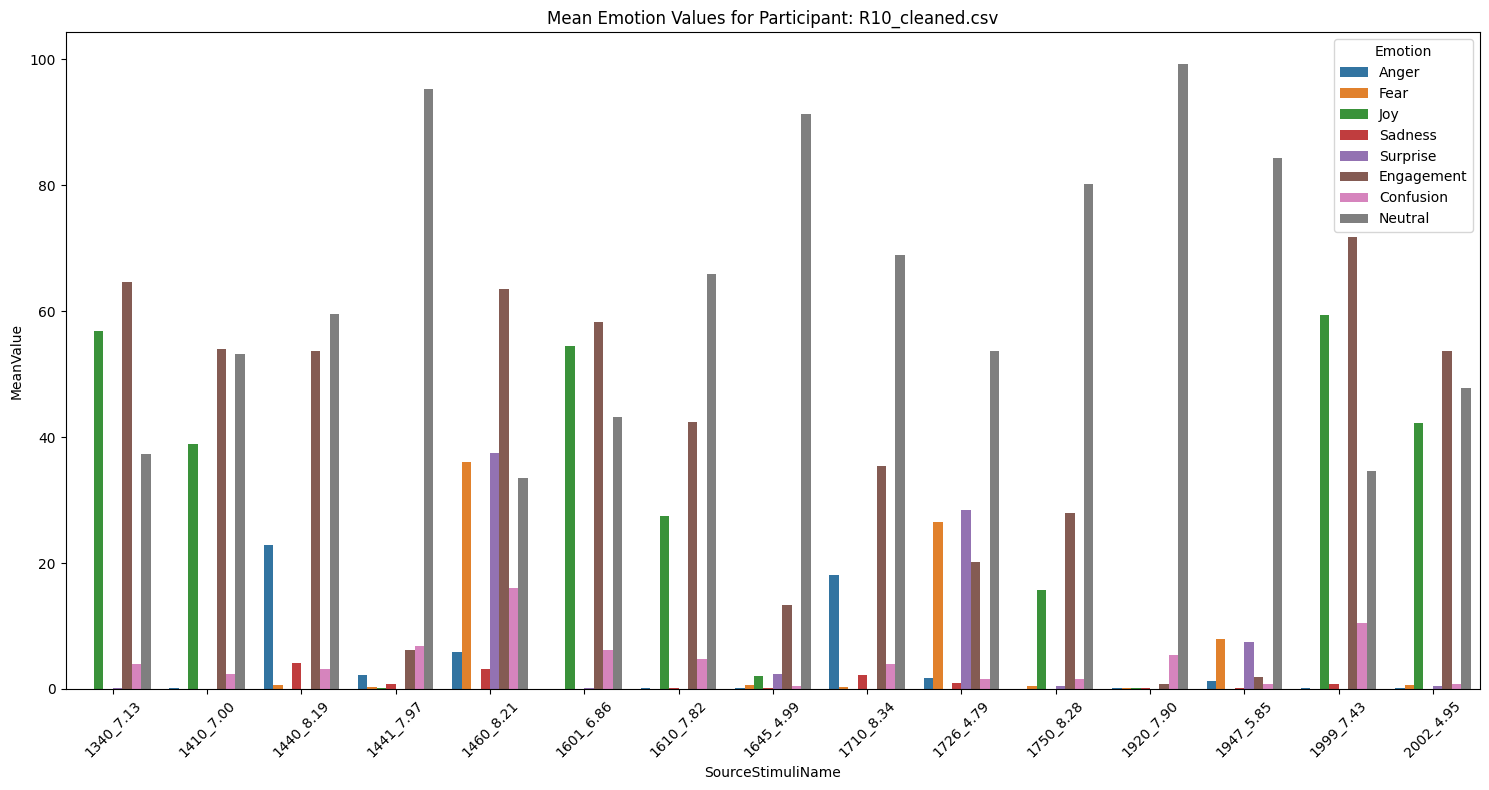

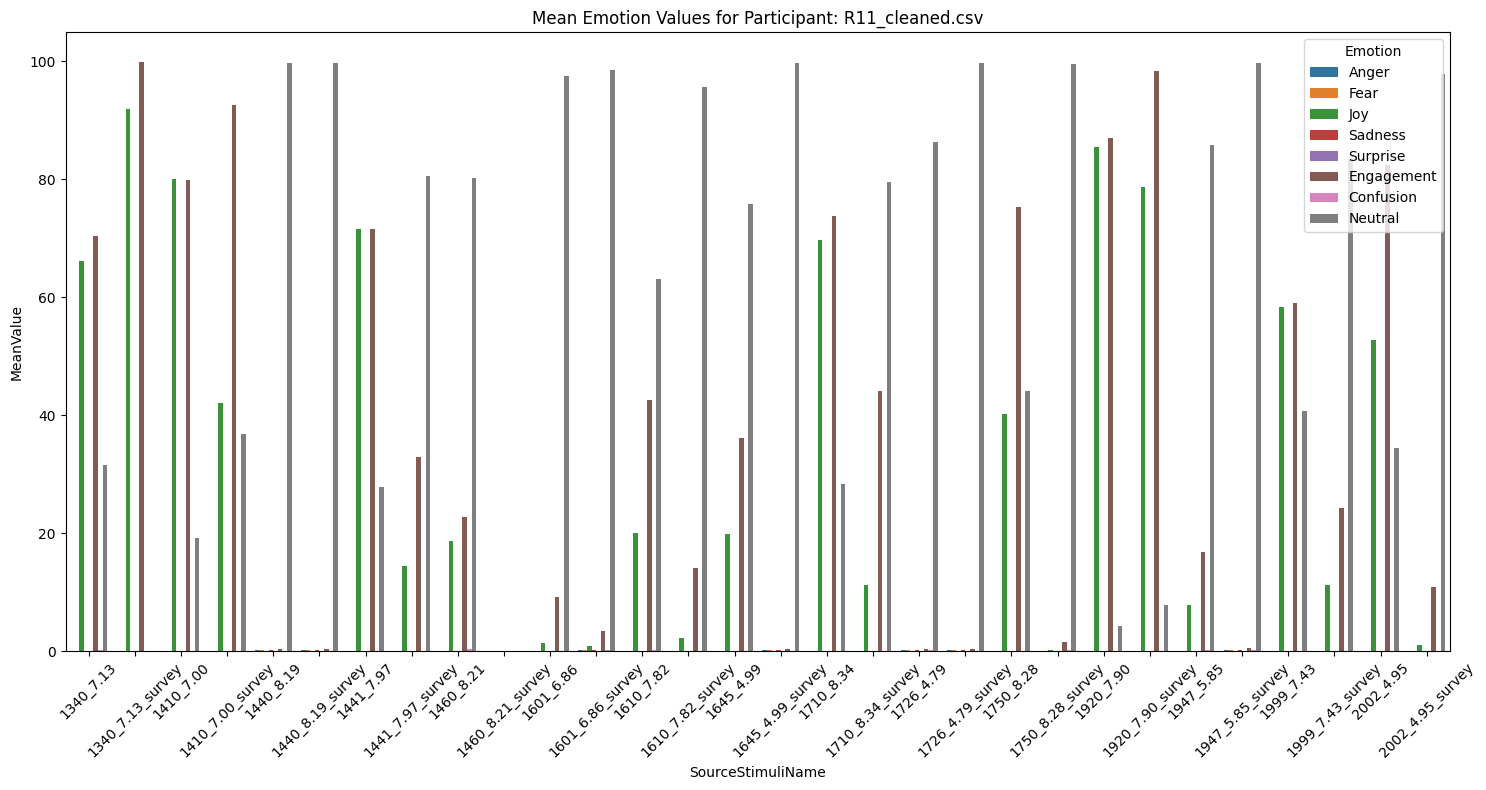

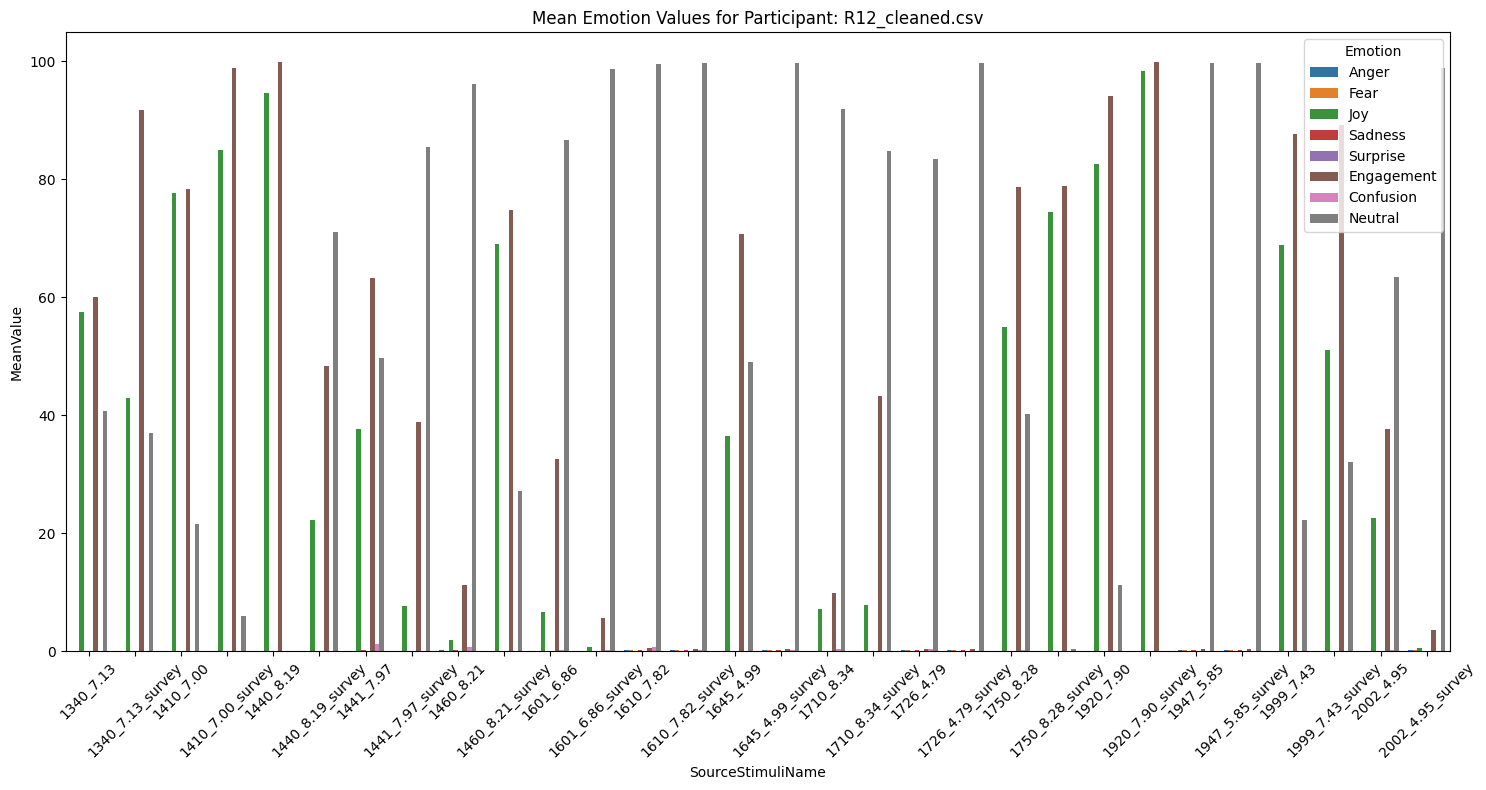

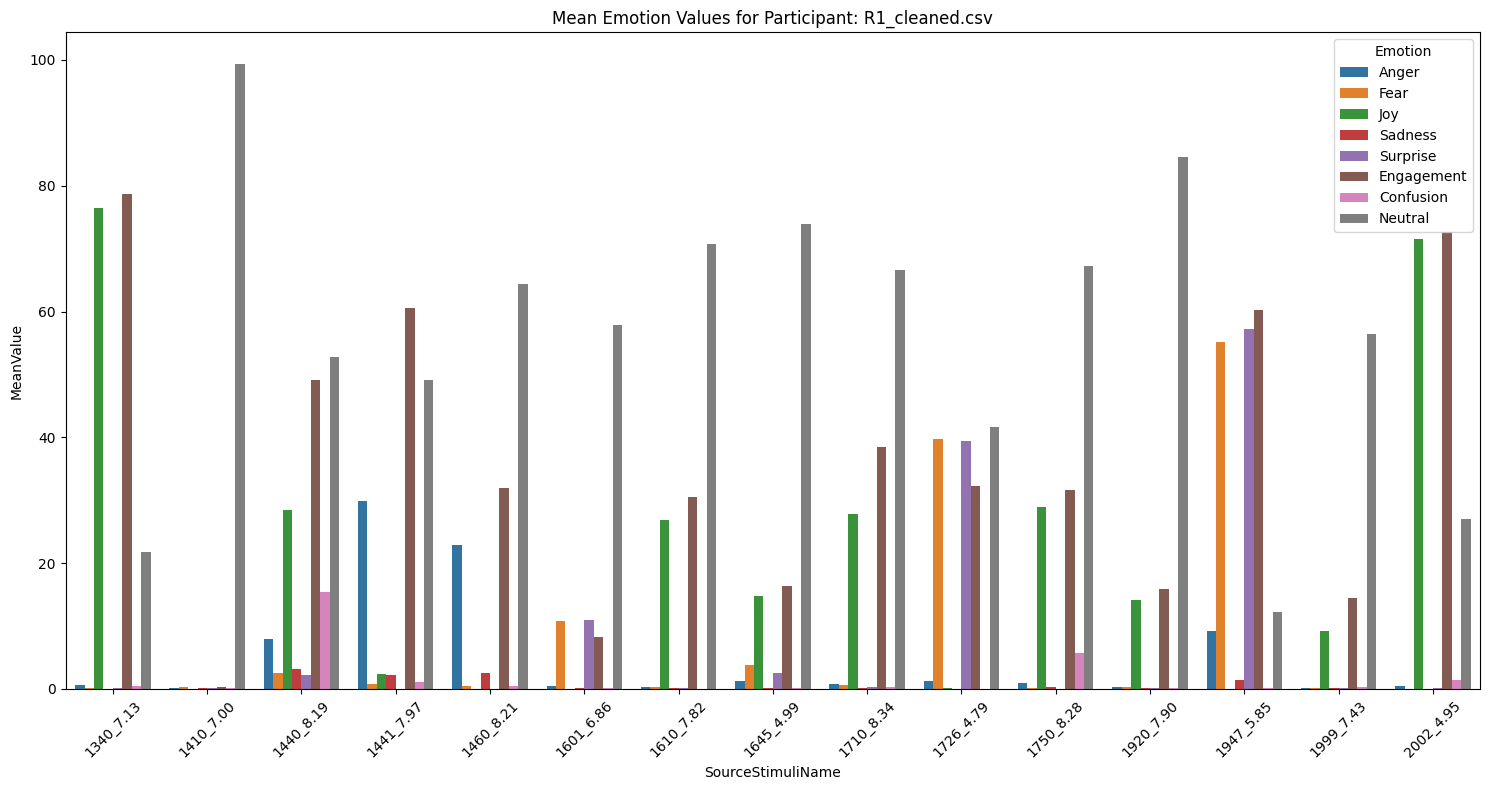

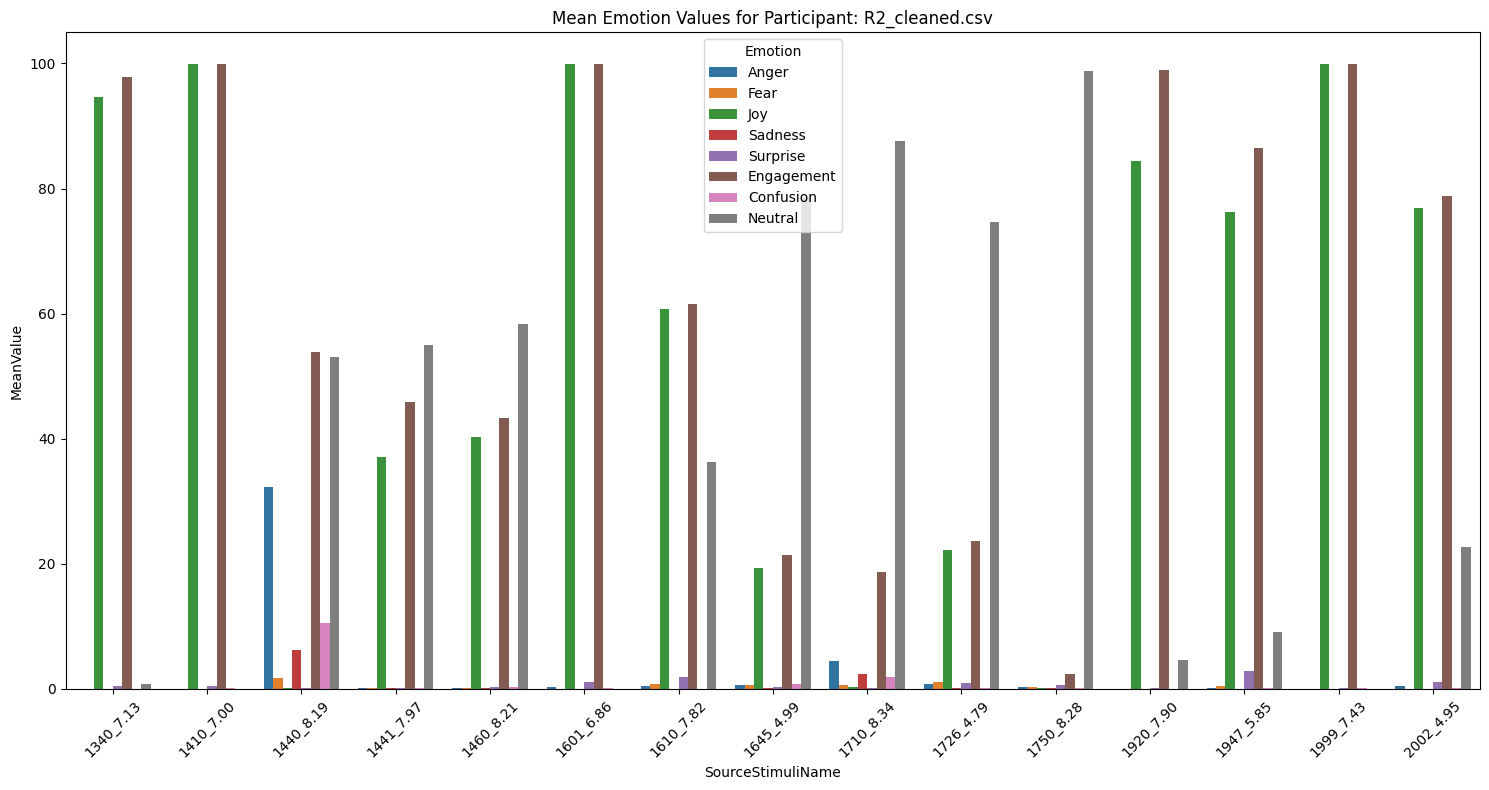

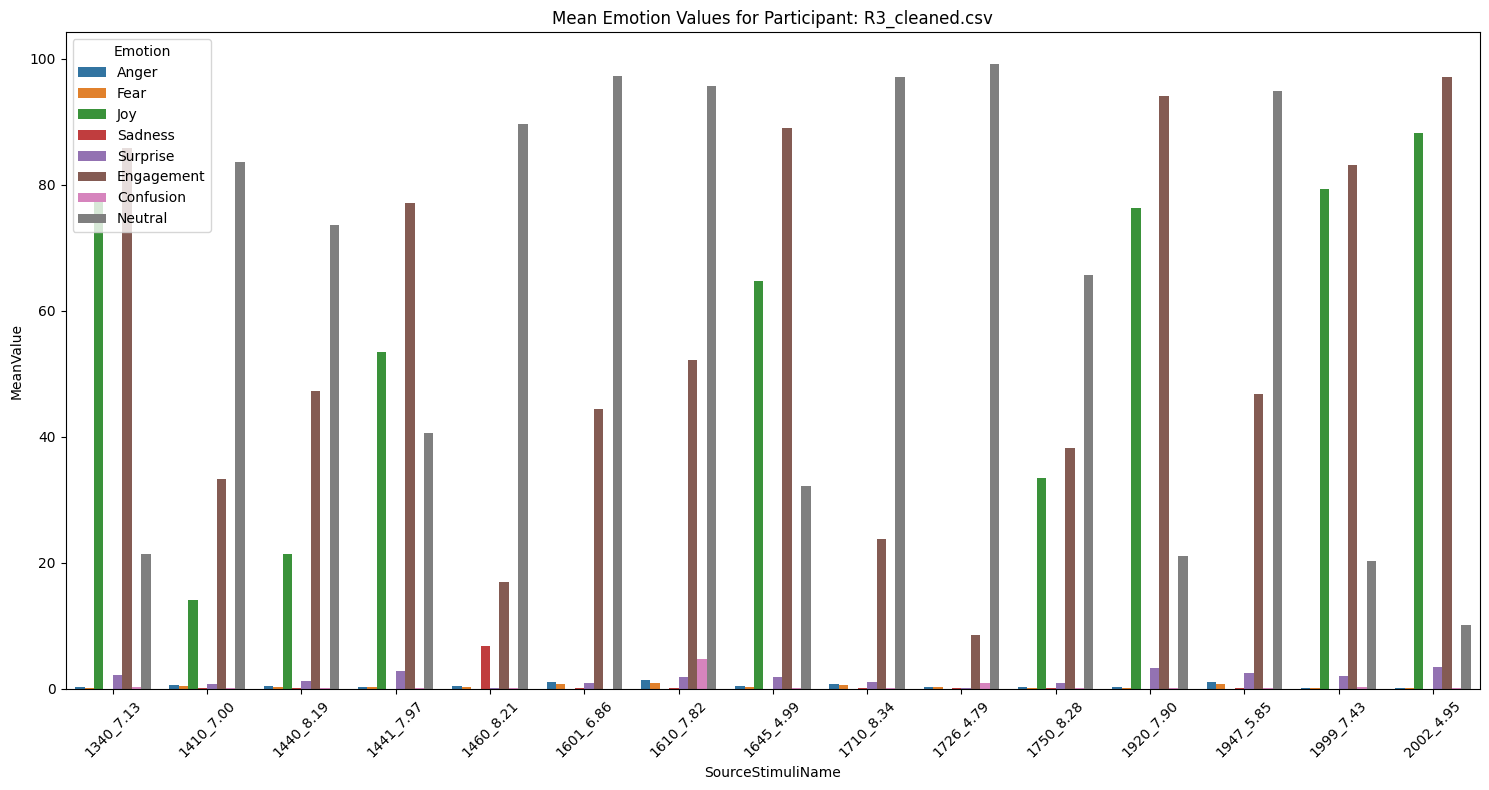

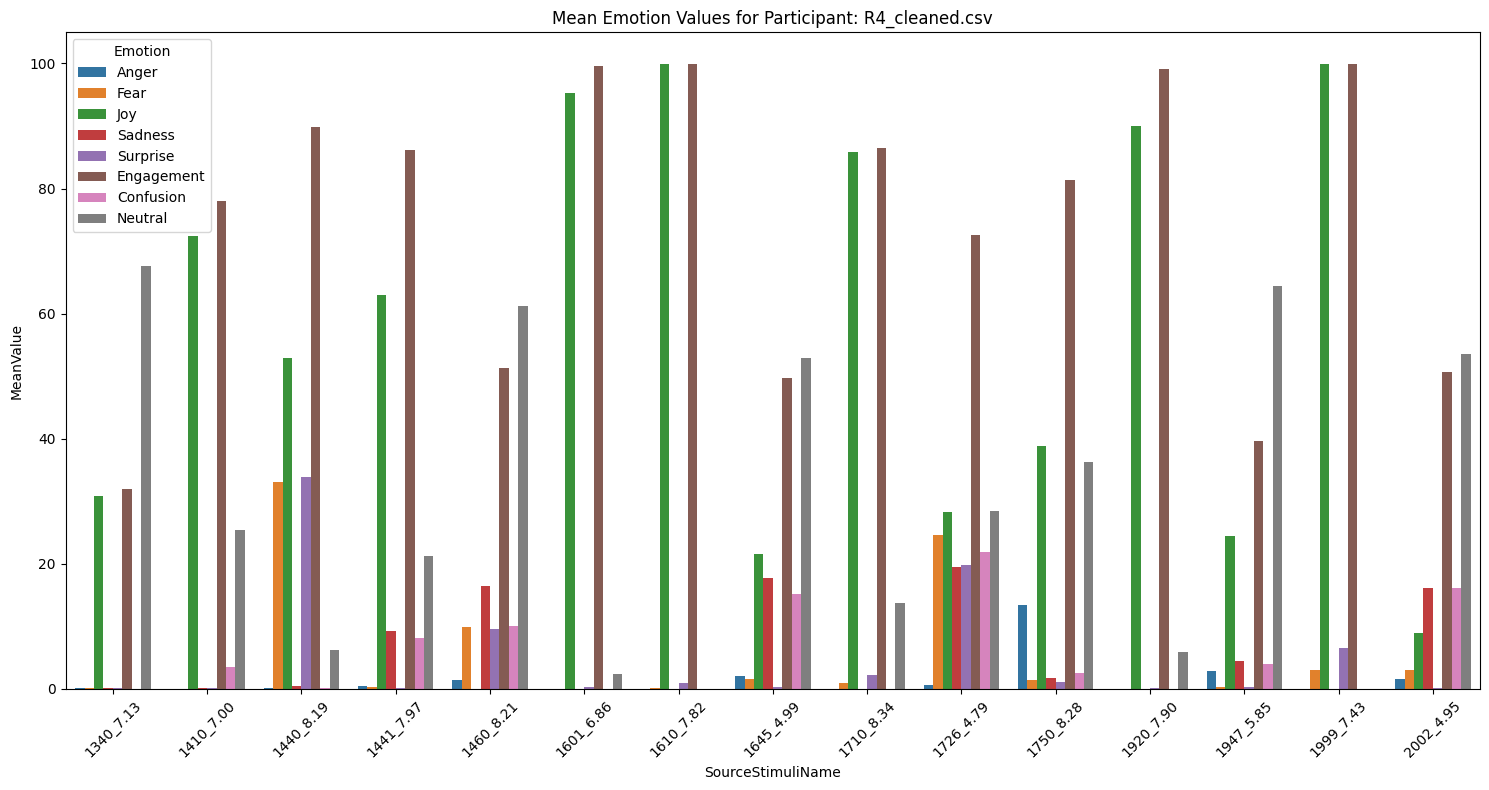

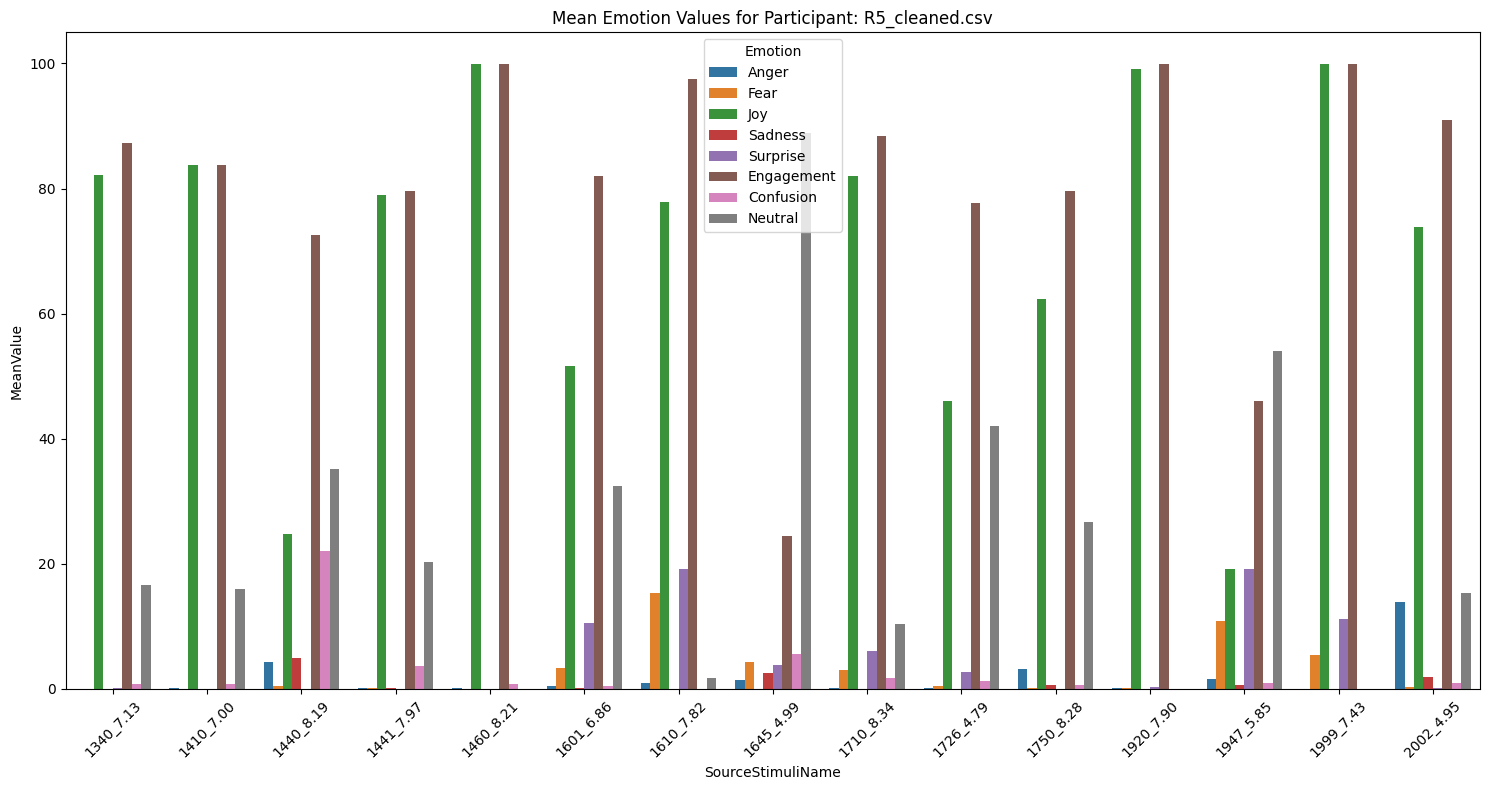

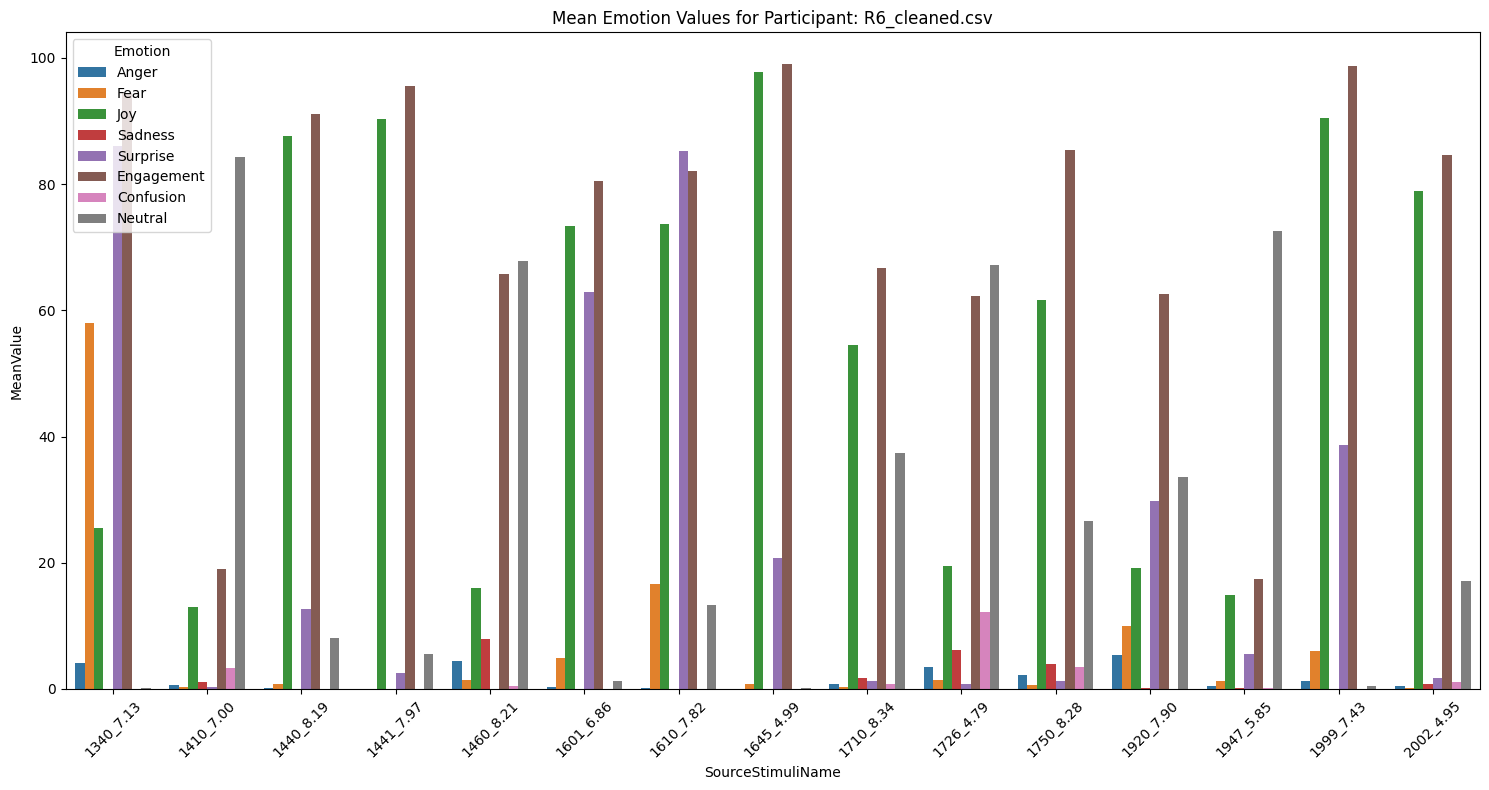

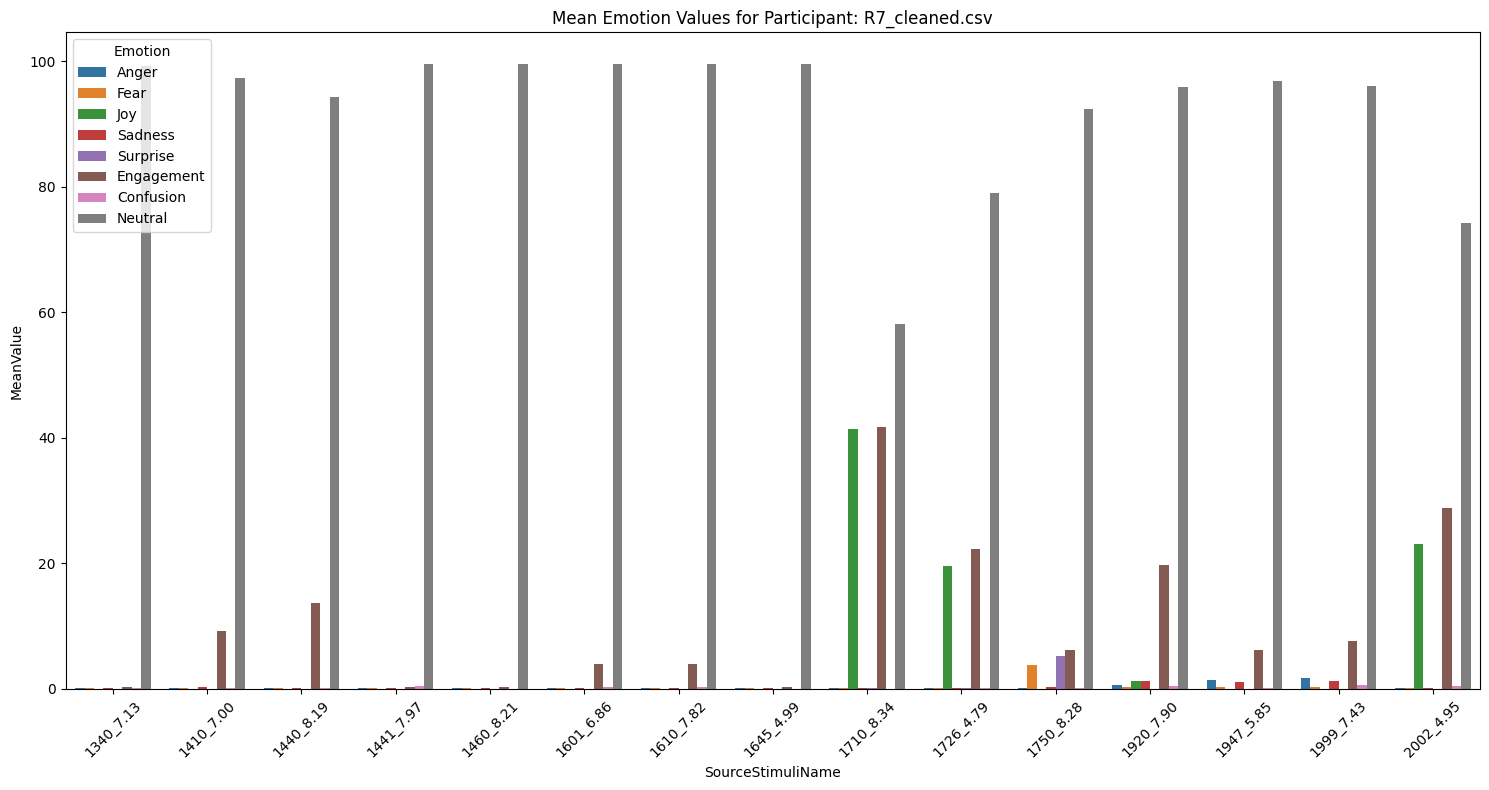

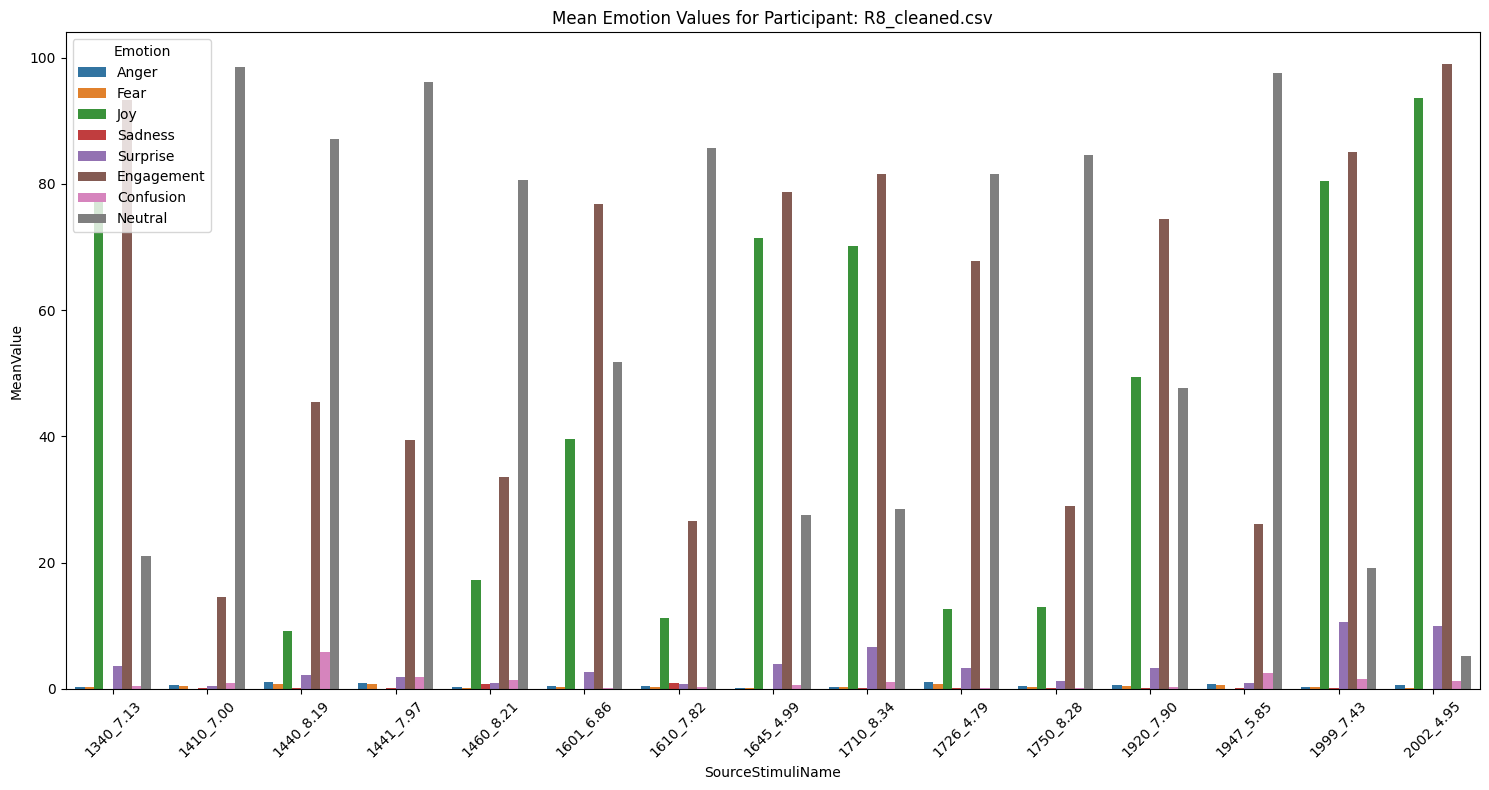

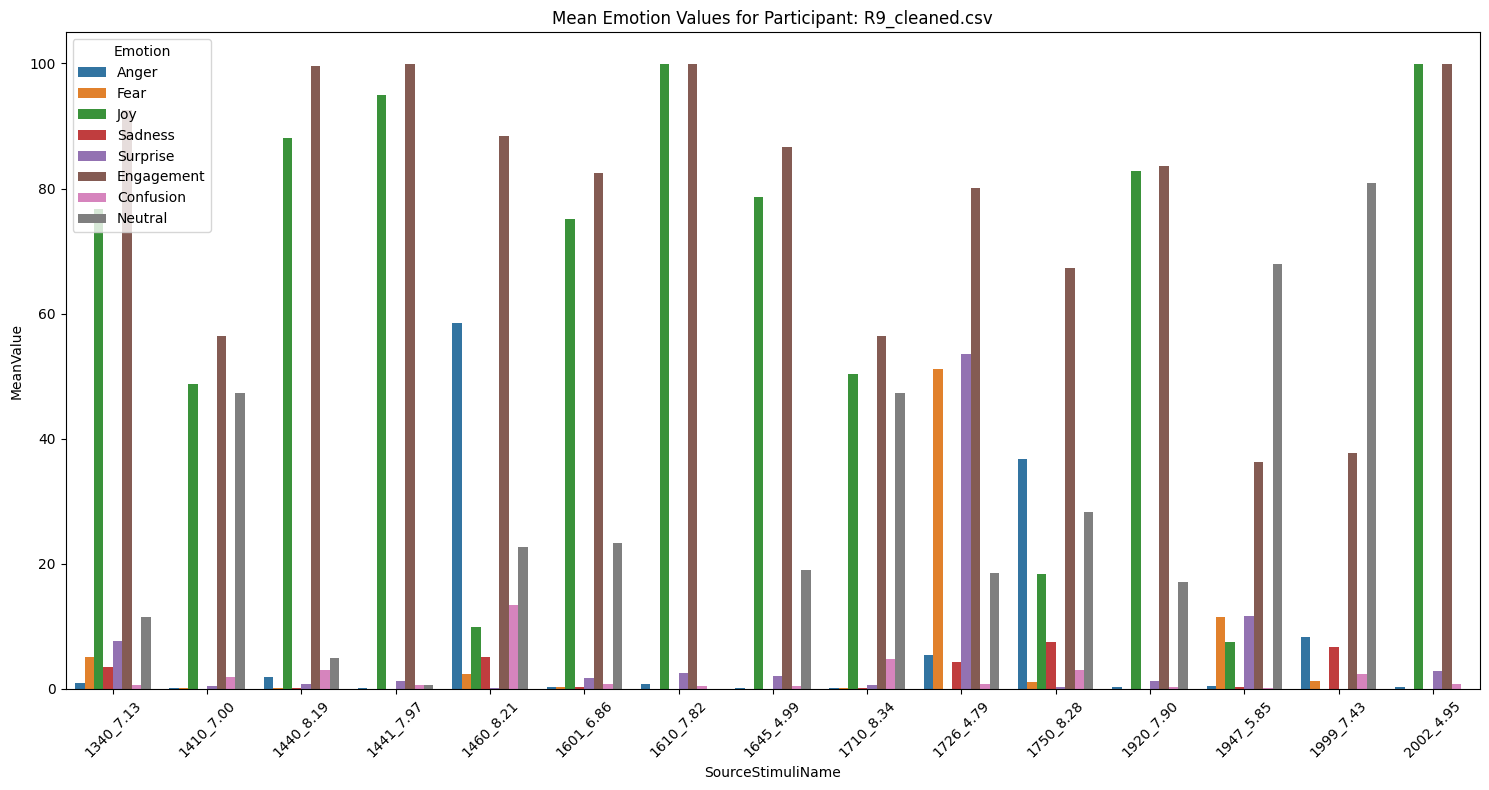

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

emotions = ['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Confusion', 'Neutral']

for filename, df in dataframes.items():
    # Calculate the mean value of each emotion for each stimulus for the given participant
    aggregated_df = df.groupby('SourceStimuliName')[emotions].mean().reset_index()
    
    # Melt the DataFrame for easier plotting
    melted_df = pd.melt(aggregated_df, id_vars=['SourceStimuliName'], value_vars=emotions, 
                        var_name='Emotion', value_name='MeanValue')
    
    # Create the plot
    plt.figure(figsize=(15, 8))
    sns.barplot(x='SourceStimuliName', y='MeanValue', hue='Emotion', data=melted_df)
    plt.title(f'Mean Emotion Values for Participant: {filename}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [53]:
# Initialize an empty DataFrame to store the peak values for all participants and stimuli
peak_values_df = pd.DataFrame(columns=['Participant', 'SourceStimuliName', 'Emotion', 
                                       'PeakValue', 'Timestamp'])

# List of emotions to consider
emotions = ['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Confusion', 'Neutral']

# Loop through all dataframes (one per participant)
for filename, df in dataframes.items():
    
    # Replace NaN values with 0
    df.fillna(0, inplace=True)
    
    # Check if the required emotion columns are present in the dataframe
    missing_emotions = [emotion for emotion in emotions if emotion not in df.columns]
    if missing_emotions:
        print(f"Skipping {filename} due to missing columns: {missing_emotions}")
        continue
    
    # Loop through each unique stimulus in the dataframe
    for stimulus in df['SourceStimuliName'].unique():
        stimulus_df = df[df['SourceStimuliName'] == stimulus]
        
        # Loop through each emotion to find the peak value and timestamp
        for emotion in emotions:
            peak_row = stimulus_df.loc[stimulus_df[emotion].idxmax()]
            peak_time = peak_row['Timestamp']
            
            # Append this information to the peak_values_df DataFrame
            new_row = pd.DataFrame({
                'Participant': [filename],
                'SourceStimuliName': [stimulus],
                'Emotion': [emotion],
                'PeakValue': [peak_row[emotion]],
                'Timestamp': [peak_time]
            })
            
            peak_values_df = pd.concat([peak_values_df, new_row], ignore_index=True)

# At this point, peak_values_df should contain the peak values for each emotion, for each stimulus, for each participant.


# highest peak among all stimuli for each participant

In [45]:
# Group by Participant and Emotion to find the maximum PeakValue
highest_peaks_df = peak_values_df.groupby(['Participant', 'Emotion'])['PeakValue'].max().reset_index()

# Merge to get the corresponding Timestamp, GSR, and Heart Rate values
highest_peaks_df = pd.merge(highest_peaks_df, peak_values_df, 
                            on=['Participant', 'Emotion', 'PeakValue'], 
                            how='left')

# Now, highest_peaks_df contains the highest peak for each emotion for each participant,
# along with the corresponding Timestamp, GSR Resistance CAL, and Heart Rate PPG ALG values.


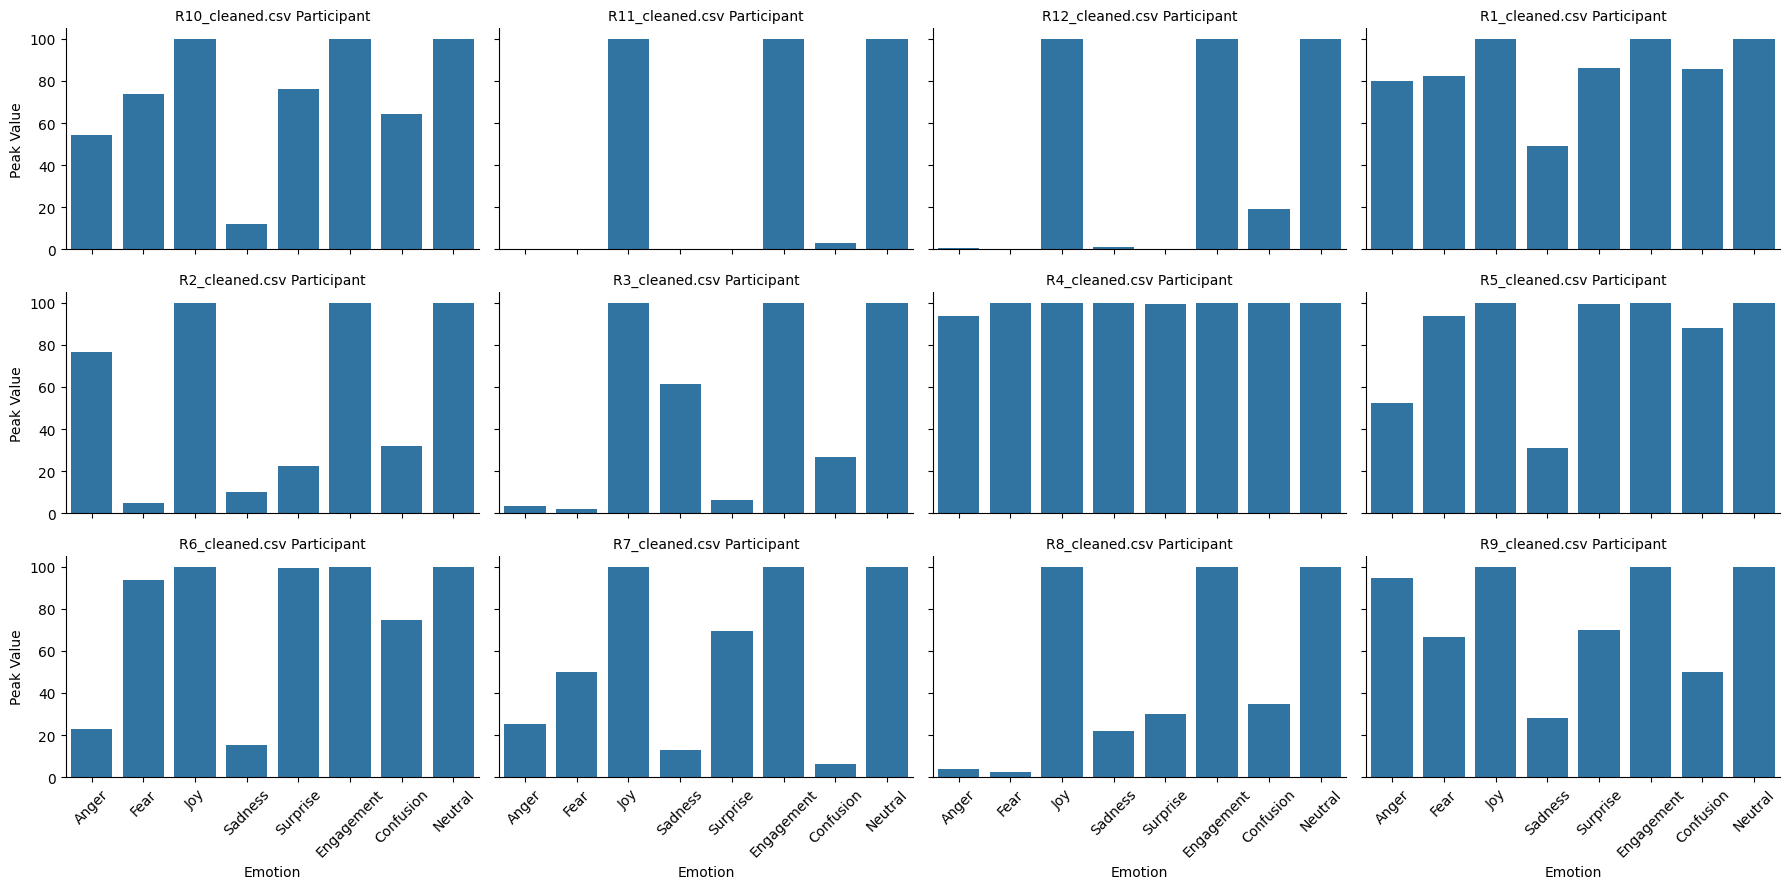

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a FacetGrid that groups data by Participant, with larger aspect ratio for each facet
g = sns.FacetGrid(highest_peaks_df, col="Participant", col_wrap=4, aspect=1.5)

# Map a barplot onto each FacetGrid subplot
g.map(sns.barplot, "Emotion", "PeakValue", order=['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Confusion', 'Neutral'])

# Customize the plot appearance
g.set_axis_labels('Emotion', 'Peak Value')
g.set_titles(col_template="{col_name} Participant")
g.set(ylim=(0, None))  # Adjust the y-axis limits

# Rotate x-axis labels and adjust font size
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotate labels
        label.set_fontsize(10)  # Reduce font size

g.tight_layout()

plt.show()


# Model Analysis

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# One-hot encode the global features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(peak_values_df[['Emotion', 'SourceStimuliName']])
feature_names = encoder.get_feature_names_out(['Emotion', 'SourceStimuliName'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Prepare features and target variable
X = encoded_df
y = peak_values_df['PeakValue']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c:\Users\raval\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'MSE', 'R2'])

# List of models to use
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'Linear Regression': LinearRegression()
}

# Prepare features and target variable
X = encoded_df
y = peak_values_df['PeakValue']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results_df = results_df.append({
        'Model': model_name,
        'MSE': mse,
        'R2': r2
    }, ignore_index=True)

# Show the results
print(results_df)

# Find the best model based on R2 score
best_model = results_df.loc[results_df['R2'].idxmax()]
print(f"The best model is {best_model['Model']} with R2 score {best_model['R2']}.")


C:\Users\raval\AppData\Local\Temp\ipykernel_1012\2205215822.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\raval\AppData\Local\Temp\ipykernel_1012\2205215822.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\raval\AppData\Local\Temp\ipykernel_1012\2205215822.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\raval\AppData\Local\Temp\ipykernel_1012\2205215822.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


                      Model          MSE        R2
0             Random Forest   684.078426  0.643546
1         Gradient Boosting   718.248892  0.625741
2  Support Vector Regressor  1229.787971  0.359193
3         Linear Regression   757.667128  0.605202
The best model is Random Forest with R2 score 0.643546495524435.


In [81]:
new_row = pd.DataFrame({
    'Model': [model_name],
    'MSE': [mse],
    'R2': [r2]
})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

# Find the best model based on R2 score
best_model = results_df.loc[results_df['R2'].idxmax()]
print(f"The best model is {best_model['Model']} with R2 score {best_model['R2']}.")


                      Model          MSE        R2
0             Random Forest   684.078426  0.643546
1         Gradient Boosting   718.248892  0.625741
2  Support Vector Regressor  1229.787971  0.359193
3         Linear Regression   757.667128  0.605202
4         Linear Regression   757.667128  0.605202
The best model is Random Forest with R2 score 0.643546495524435.


# Conclusion

The machine learning experiment evaluated four models: Random Forest, Gradient Boosting, Support Vector Regressor, and Linear Regression, aiming to predict emotional peak values. The Random Forest model outperformed the others, achieving an R2 score of 0.644, which means it explains about 64.4% of the variance in the emotional peaks. This was followed by Gradient Boosting, Linear Regression, and lastly, the Support Vector Regressor. Therefore, Random Forest appears to be the best choice for this specific task.